# ROTATION

In [1]:
#from math import cos, sin, pi

def label_rotation(pathr,pathw,angle=90,rad=False):
    from math import cos, sin, pi
    import os
    if(os.path.exists(pathw)):
        os.remove(pathw)
    #angle unit
    if(not rad):
        angle=float(angle)*pi/180.
    #read file
    f=open(pathr,"r")
    Lines=f.readlines()
    f.close()
    for line in Lines:
        k=0
        while(line[k]!=' '):
            k+=1
        x=float(line[k+1:k+9])
        y=float(line[k+10:k+18])
        w=float(line[k+19:k+27])
        h=float(line[k+28:k+36])
        #change axis
        xc=x-0.5
        yc=1-y-0.5
        x_slu=xc-0.5*w
        y_slu=yc+0.5*h
        x_sru=xc+0.5*w
        y_sru=yc+0.5*h
        x_srb=xc+0.5*w
        y_srb=yc-0.5*h
        x_slb=xc-0.5*w
        y_slb=yc-0.5*h
        #rotate
        xc_r=xc*cos(angle)-yc*sin(angle)
        yc_r=xc*sin(angle)+yc*cos(angle)
        x_slu_r=x_slu*cos(angle)-y_slu*sin(angle)
        y_slu_r=x_slu*sin(angle)+y_slu*cos(angle)
        x_sru_r=x_sru*cos(angle)-y_sru*sin(angle)
        y_sru_r=x_sru*sin(angle)+y_sru*cos(angle)
        x_srb_r=x_srb*cos(angle)-y_srb*sin(angle)
        y_srb_r=x_srb*sin(angle)+y_srb*cos(angle)
        x_slb_r=x_slb*cos(angle)-y_slb*sin(angle)
        y_slb_r=x_slb*sin(angle)+y_slb*cos(angle)
        #new square
        all_x=[x_slu_r,x_sru_r,x_srb_r,x_slb_r]
        all_y=[y_slu_r,y_sru_r,y_srb_r,y_slb_r]
        w_r=max(all_x)-min(all_x)
        h_r=max(all_y)-min(all_y)
        #final val
        xn=xc_r+0.5
        yn=1-yc_r-0.5
        wn=w_r
        hn=h_r
        #write in file
        write=line[0:k]+" %0.6f %0.6f %0.6f %0.6f\n"%(xn,yn,wn,hn)
        f=open(pathw,"a")
        f.write(write)
        f.close()
        
                                           
def printsquare(pathi,pathl,mat=False):
    from matplotlib.pyplot import imread,imshow
    import matplotlib.pyplot as plt
    import numpy as np
    f=open(pathl,"r")
    Lines=f.readlines()
    f.close()
    if(mat==False):
        im=imread(pathi)
    else:
        im=mat
    img=np.copy(im)
    print(img.shape)
    haut=img.shape[0]
    wei=img.shape[1]
    print(haut)
    print(wei)
    plt.scatter(wei//2, haut//2,
            marker='x', s=169, linewidths=3,
            color='b', zorder=10)
    for line in Lines:
        k=0
        while(line[k]!=' '):
            k+=1
        x=float(line[k+1:k+9])
        y=float(line[k+10:k+18])
        w=float(line[k+19:k+27])
        h=float(line[k+28:k+36])
        xc=int(x*wei)
        yc=int(y*haut)
        x_slu=int((x-0.5*w)*wei)
        print("x:"+str(x_slu))
        y_slu=int((y-0.5*h)*haut)
        print("y:"+str(y_slu))
        x_sru=int((x+0.5*w)*wei)
        y_sru=int((y-0.5*h)*haut)
        x_srb=int((x+0.5*w)*wei)
        y_srb=int((y+0.5*h)*haut)
        x_slb=int((x-0.5*w)*wei)
        y_slb=int((y+0.5*h)*haut)
        
        img[y_slu-1:y_slu+2,x_slu:x_sru+1,0]=255
        img[y_slu-1:y_slu+2,x_slu:x_sru+1,1]=0
        img[y_slu-1:y_slu+2,x_slu:x_sru+1,2]=0
        
        img[y_slb-1:y_slb+2,x_slu:x_sru+1,0]=255
        img[y_slb-1:y_slb+2,x_slu:x_sru+1,1]=0
        img[y_slb-1:y_slb+2,x_slu:x_sru+1,2]=0
        
        img[y_slu:y_slb+1,x_slu-1:x_slu+2,0]=255
        img[y_slu:y_slb+1,x_slu-1:x_slu+2,1]=0
        img[y_slu:y_slb+1,x_slu-1:x_slu+2,2]=0
        
        img[y_slu:y_slb+1,x_sru-1:x_sru+2,0]=255
        img[y_slu:y_slb+1,x_sru-1:x_sru+2,1]=0
        img[y_slu:y_slb+1,x_sru-1:x_sru+2,2]=0
        plt.scatter(xc, yc,
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
        
    

    imshow(img)
    
def rotate_img(path,angle=False,rot=1):
    from PIL import Image
    import random
    image = Image.open(path)
#     if(angle==False):
#         angle=random.randint(0,360)
#     image = image.rotate( angle, Image.BILINEAR )

    image = image.transpose(rot)
    return image

def get_fname(file_nb):
    return (12-len(str(file_nb)))*'0'+str(file_nb)

def perform_rotation(path_of_images,path_of_labels,path_rotate_images,path_rotate_labels):
    import os
    import random
    import shutil
    import imageio
    mini=36
    maxi=311957
    for i in range(mini,maxi+1):
        if os.path.exists(path_of_images+"COCO_train2014_"+get_fname(i)+".jpg"):
            rota=random.randint(2,4)
            img=rotate_img(path_of_images+"COCO_train2014_"+get_fname(i)+".jpg",rot=rota)
            imageio.imwrite(path_rotate_images+"COCO_train2014_"+get_fname(i)+"_rot.jpg",img) 
            rota=(rota-1)*90
            label_rotation(path_of_labels+"COCO_train2014_"+get_fname(i)+".txt",
                           path_rotate_labels+"COCO_train2014_"+get_fname(i)+"_rot.txt",angle=rota)
            shutil.copy(path_of_images+"COCO_train2014_"+get_fname(i)+".jpg",
                        path_rotate_images+"COCO_train2014_"+get_fname(i)+".jpg")
            shutil.copy(path_of_labels+"COCO_train2014_"+get_fname(i)+".txt",
                        path_rotate_labels+"COCO_train2014_"+get_fname(i)+".txt")
            
            
     
      
    

In [147]:
%%time
import os
try:
    os.mkdir("data_divided/data_rotate")
except:
    print("data_rotate already exist")
try:
    os.mkdir("data_divided/data_rotate/train2014")
except:
    print("data_divided/data_rotate/train2014 already exist")
try:
    os.mkdir("data_divided/data_rotate/train2014/images")
except:
    print("data_divided/data_rotate/train2014/images already exist")
try:
    os.mkdir("data_divided/data_rotate/train2014/labels")
except:
    print("data_divided/data_rotate/train2014/labels already exist")
    
path_of_images="data_divided/images/train2014/"
path_of_labels="data_divided/labels/train2014/"
path_rotate_images="data_divided/data_rotate/train2014/images/"
path_rotate_labels="data_divided/data_rotate/train2014/labels/"

perform_rotation(path_of_images,path_of_labels,path_rotate_images,path_rotate_labels)

Wall time: 3min 3s


# Some tests (don't run)

In [116]:
import random
for i in range(30):
    print(random.randint(1,4))

2
2
3
2
4
3
2
2
1
4
3
2
1
1
1
1
3
3
3
2
1
4
1
3
3
3
4
1
3
3


In [23]:
pathr="data_divided/labels/train2014/COCO_train2014_000000000049.txt"
pathw="TEST_COCO_train2014_000000000049.txt"
label_rotation(pathr,pathw,angle=30)

(500, 381, 3)
500
381
x:88
y:89
x:215
y:96
x:111
y:166
x:205
y:175
x:249
y:132
x:108
y:26
x:85
y:139
x:182
y:142
x:19
y:157


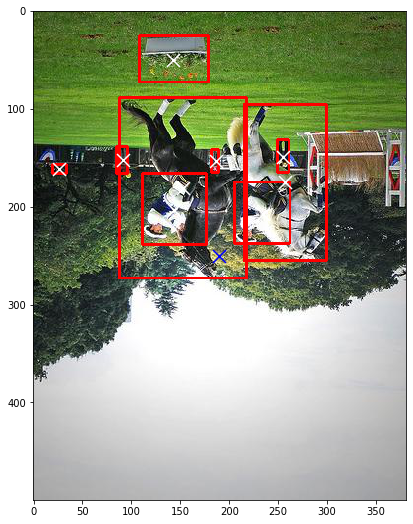

In [4]:
import matplotlib as plt
plt.rcParams['figure.figsize']=(16,9)

pathi="data_divided/data_rotate/train2014/images/COCO_train2014_000000000049_rot.jpg"
pathl="data_divided/data_rotate/train2014/labels/COCO_train2014_000000000049_rot.txt"
pathw="TEST_COCO_train2014_000000000049.txt"
printsquare(pathi,pathl)


In [130]:
from matplotlib.pyplot import imread,imshow
import matplotlib.pyplot as plt
path="COCO_train2014_000000000049.jpg"
rot=rotate_img(path,angle=90,rot=3)
rot.savefig("testttt.jpg")
#imshow(rot)

pathr="data_divided/labels/train2014/COCO_train2014_000000000049.txt"
pathw="TEST_COCO_train2014_000000000049.txt"
label_rotation(pathr,pathw,angle=270)

printsquare("",pathw,mat=rot)


AttributeError: 'Image' object has no attribute 'savefig'

In [144]:
import imageio
path="COCO_train2014_000000000049.jpg"
rot=rotate_img(path,angle=90,rot=3)
im=np.copy(rot)
fig = 
imageio.imwrite("imagesave.jpg",im)

In [3]:
import numpy as np
path="COCO_train2014_000000000049.jpg"
rot=rotate_img(path,angle=90,rot=2)
arr=np.copy(rot)

from matplotlib.figure import Figure
import matplotlib.pyplot as plt

fig = Figure(figsize=[arr.shape[1],arr.shape[0]],dpi=1)
# canvas = FigureCanvas(fig)
fig.figimage(arr)
fig.savefig("imagesave.jpg")


# kk=plt.imread("imagesave.jpg")
# plt.imshow(kk)

In [6]:
path="data_divided/labels/train2014/COCO_train2014_000000000049.txt"
f=open(path,"r")
Lines=f.readlines()
f.close()
print(Lines)
line=Lines[0]
k=0
while(line[k]!=' '):
    k+=1
print(k)
x=float(line[k+1:k+9])
y=float(line[k+10:k+18])
w=float(line[k+19:k+27])
h=float(line[k+28:k+36])
print(x)
print(y)
print(w)
print(h)
xc=x-0.5
yc=1-y-0.5
print(xc)
print(yc)

['17 0.597835 0.637550 0.342283 0.368860\n', '17 0.324291 0.648080 0.219711 0.316400\n', '0 0.620039 0.593900 0.172415 0.146080\n', '0 0.385525 0.585570 0.149370 0.125860\n', '0 0.328898 0.701990 0.031339 0.067140\n', '58 0.622546 0.899610 0.185932 0.094460\n', '0 0.760577 0.694230 0.028556 0.054860\n', '0 0.510709 0.692150 0.018793 0.046820\n', '0 0.929554 0.676020 0.038845 0.018440\n']
2
0.597835
0.63755
0.342283
0.36886
0.097835
-0.13754999999999995


In [9]:
from math import cos, sin, pi
print(sin(pi))

1.2246467991473532e-16


In [12]:
a=[3,8,4,1,7]
print(min(a))

1


In [20]:
from math import pi
c="aaa:%0.3fff%0.3f"%(pi,pi)
print(c)

aaa:3.142ff3.142
